### Analyser les dépenses des ménages avec Python

## Contexte et objectifs du projet

Objectif :
Analyser la structure des dépenses des ménages afin d'identifier les facteurs de vulnérabilité financière et proposer des recommandations pour améliorer le bien-être économique.

# Bibliothèques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# Génération et importation des données

In [17]:
np.random.seed(42)

n = 100

data = {
    "Menage_ID": range(1, n+1),
    "Taille_menage": np.random.randint(1, 8, n),
    "Revenu_mensuel": np.random.randint(150000, 800000, n),
}

df = pd.DataFrame(data)

df["Depense_alimentation"] = (df["Revenu_mensuel"] * np.random.uniform(0.25, 0.45, n)).astype(int)
df["Depense_logement"] = (df["Revenu_mensuel"] * np.random.uniform(0.15, 0.30, n)).astype(int)
df["Depense_transport"] = (df["Revenu_mensuel"] * np.random.uniform(0.05, 0.15, n)).astype(int)
df["Depense_sante"] = (df["Revenu_mensuel"] * np.random.uniform(0.03, 0.10, n)).astype(int)
df["Depense_education"] = (df["Revenu_mensuel"] * np.random.uniform(0.05, 0.15, n)).astype(int)
df["Depense_autres"] = (df["Revenu_mensuel"] * np.random.uniform(0.05, 0.10, n)).astype(int)

df.head()


,Menage_ID,Taille_menage,Revenu_mensuel,Depense_alimentation,Depense_logement,Depense_transport,Depense_sante,Depense_education,Depense_autres
0,1,7,637879,174761,150881,32812,46740,95467,48213
1,2,4,714685,226928,160002,44029,26499,75430,54748
2,3,5,503531,220839,90276,27492,18070,63897,27874
3,4,7,413160,129996,106747,22340,32667,59691,29900
4,5,3,729879,258200,140221,98932,25613,98507,55931


In [18]:
df.to_csv("menages.csv", index=False)

# Compréhension et exploration des données

In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Menage_ID             100 non-null    int64
 1   Taille_menage         100 non-null    int32
 2   Revenu_mensuel        100 non-null    int32
 3   Depense_alimentation  100 non-null    int64
 4   Depense_logement      100 non-null    int64
 5   Depense_transport     100 non-null    int64
 6   Depense_sante         100 non-null    int64
 7   Depense_education     100 non-null    int64
 8   Depense_autres        100 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 6.4 KB


,Menage_ID,Taille_menage,Revenu_mensuel,Depense_alimentation,Depense_logement,Depense_transport,Depense_sante,Depense_education,Depense_autres
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,4.210000,468672.500000,162955.940000,109383.280000,46322.370000,31136.920000,45978.720000,34330.390000
std,29.011492,1.913773,194209.947085,73449.267387,54948.542331,23954.625104,16487.267023,24480.730163,16177.074184
min,1.000000,1.000000,162666.000000,51876.000000,30775.000000,9133.000000,6221.000000,8369.000000,10010.000000
25%,25.750000,2.750000,287468.500000,103691.500000,61886.000000,29034.250000,18919.750000,26285.000000,22364.000000
50%,50.500000,4.000000,451226.000000,147371.000000,103004.000000,44335.000000,25318.000000,42614.500000,31607.000000
75%,75.250000,6.000000,632535.250000,224362.250000,145356.000000,61653.000000,41291.500000,64009.250000,48388.000000
max,100.000000,7.000000,798663.000000,324250.000000,231950.000000,109445.000000,75000.000000,98507.000000,73118.000000


# Création de nouvelles variables

In [6]:
depenses_cols = [
    "Depense_alimentation",
    "Depense_logement",
    "Depense_transport",
    "Depense_sante",
    "Depense_education",
    "Depense_autres"
]

df["Depenses_totales"] = df[depenses_cols].sum(axis=1)
df["Revenu_par_personne"] = df["Revenu_mensuel"] / df["Taille_menage"]
df["Deficit"] = df["Depenses_totales"] > df["Revenu_mensuel"]


# Analyse descriptive

### 1 Revenu mensuel

In [7]:
df["Revenu_mensuel"].describe()

count       100.000000
mean     468672.500000
std      194209.947085
min      162666.000000
25%      287468.500000
50%      451226.000000
75%      632535.250000
max      798663.000000
Name: Revenu_mensuel, dtype: float64

### 2 Taille des ménages

In [8]:
df["Taille_menage"].value_counts()

Taille_menage
4    21
2    17
7    16
6    15
5    12
3    11
1     8
Name: count, dtype: int64

### 3 Dépenses moyennes

In [9]:
df[depenses_cols].mean()

Depense_alimentation    162955.94
Depense_logement        109383.28
Depense_transport        46322.37
Depense_sante            31136.92
Depense_education        45978.72
Depense_autres           34330.39
dtype: float64

# Identification des ménages vulnérables

In [10]:
df["Vulnerable"] = (df["Deficit"] == True) | (df["Revenu_par_personne"] < 80000)
df["Vulnerable"].value_counts()


Vulnerable
False    67
True     33
Name: count, dtype: int64

# Visualisations

#### 1 Distribution des revenus

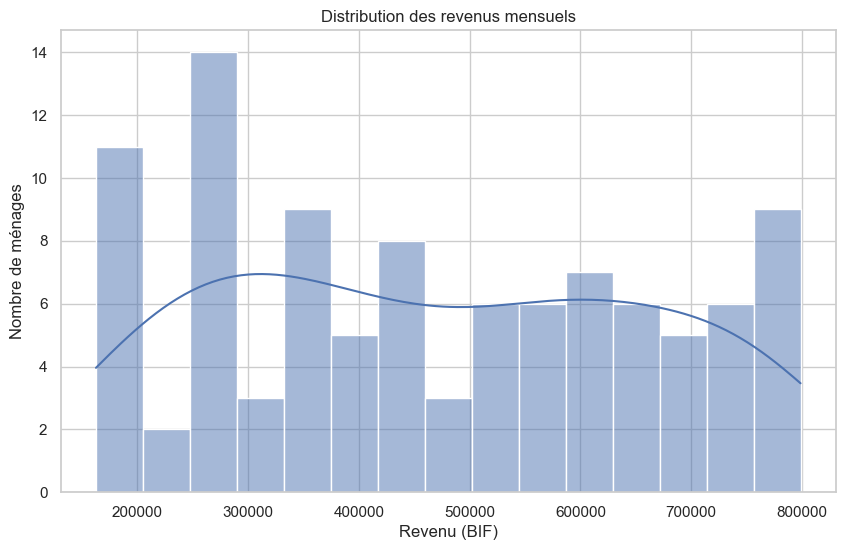

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df["Revenu_mensuel"], bins=15, kde=True)
plt.title("Distribution des revenus mensuels")
plt.xlabel("Revenu (BIF)")
plt.ylabel("Nombre de ménages")
plt.show()


#### 2 Dépenses moyennes par catégorie

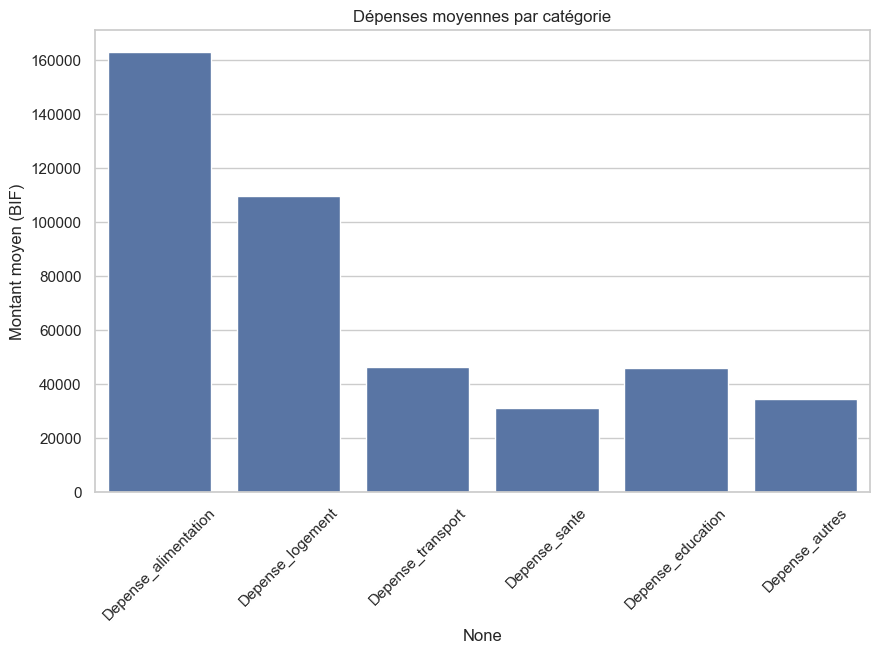

In [12]:
depenses_moy = df[depenses_cols].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=depenses_moy.index, y=depenses_moy.values)
plt.title("Dépenses moyennes par catégorie")
plt.ylabel("Montant moyen (BIF)")
plt.xticks(rotation=45)
plt.show()


#### 3 Revenu selon la taille du ménage

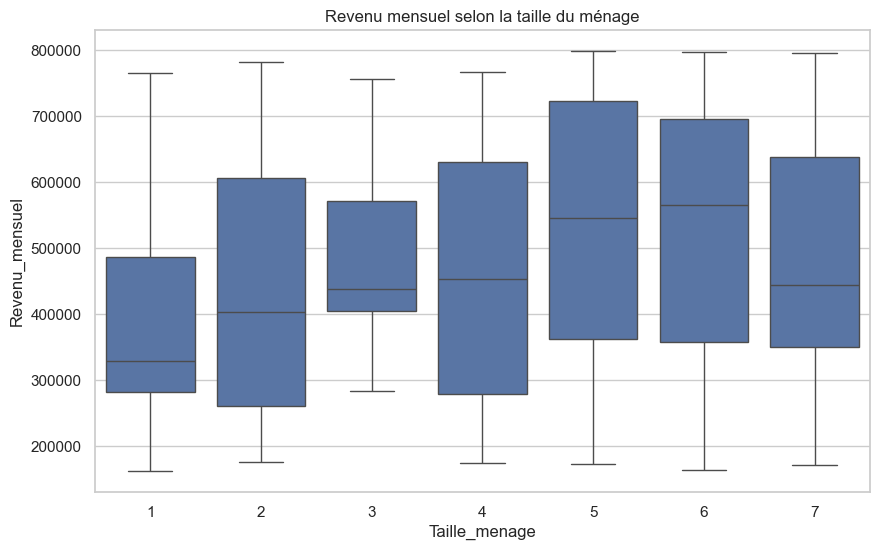

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Taille_menage", y="Revenu_mensuel", data=df)
plt.title("Revenu mensuel selon la taille du ménage")
plt.show()


#### 4 Totaux des revenus et des dépenses

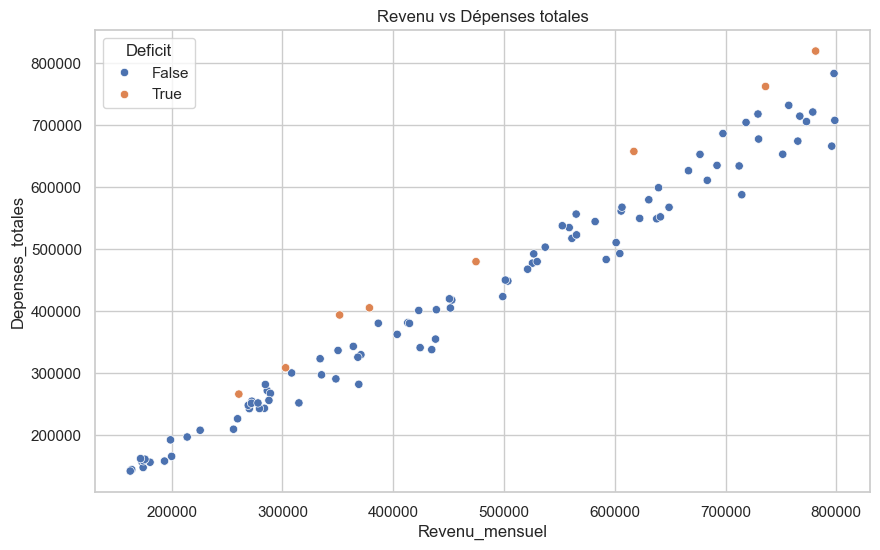

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Revenu_mensuel",
    y="Depenses_totales",
    hue="Deficit",
    data=df
)
plt.title("Revenu vs Dépenses totales")
plt.show()


#### 5 Corrélation entre revenus et dépenses

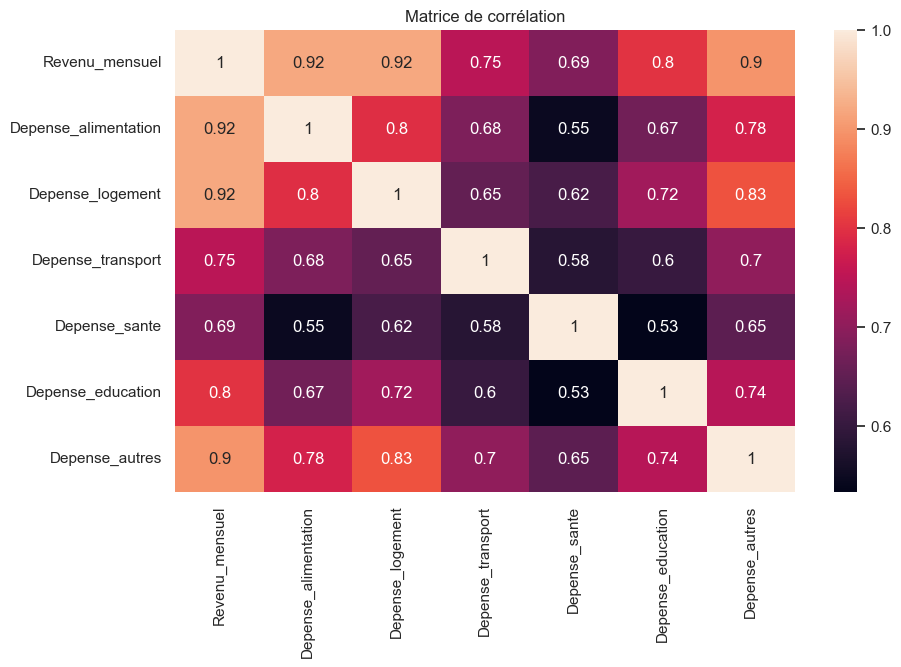

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["Revenu_mensuel"] + depenses_cols].corr(), annot=True)
plt.title("Matrice de corrélation")
plt.show()


# Interprétation des résultats

Les dépenses d'alimentation et de logement dominent le budget

Les ménages nombreux ont un revenu par personne plus faible

Une proportion importante des ménages est en déficit

# Conclusions

Les ménages à faible revenu et de grande taille sont plus vulnérables

Le déficit budgétaire est un indicateur clé de risque